# Исследование закономерностей в интернет-магазине компьютерных игр.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:** выявить определяющие успешность игры закономерности.

**Ход исследования:** 

1. Ознакомление с данными.
2. Подготовка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.
6. Выводы.

**Описание данных:**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

##  Ознакомление с данными 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Вывод: в таблице присутствуют пропуски, типы данных в некоторых столбцах не логичны, названия столбцов не приведены к нижнему регистру.

## Подготовка данных.

Заменим названия столбцов (приведем к нижнему регистру)

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим количество пропусков в столбце year_of_release

In [8]:
df['year_of_release'].isna().sum()

269

In [9]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим количество пропусков. 

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим процент пропусков.

In [11]:
(df.isna().sum() / df.shape[0]).round(4)*100

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

Запишем все эти 269 строк в переменную data_nan_year_of_release.

In [12]:
data_nan_year_of_release = df.loc[df['year_of_release'].isna()]
data_nan_year_of_release.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Найдем игру с названием SimCity 2000, но датами выхода не в 2000г.	

In [13]:
df.loc[df['name'] == 'SimCity 2000']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
769,SimCity 2000,PC,1992.0,Simulation,1.20,0.84,0.00,0.10,NaN,NaN,NaN
1646,SimCity 2000,PS,1996.0,Simulation,0.68,0.46,0.00,0.08,NaN,NaN,NaN
4066,SimCity 2000,SNES,1995.0,Simulation,0.00,0.00,0.49,0.00,NaN,NaN,NaN
6219,SimCity 2000,SAT,1994.0,Simulation,0.00,0.00,0.28,0.00,NaN,NaN,NaN
10408,SimCity 2000,GBA,2003.0,Simulation,0.08,0.03,0.00,0.00,62.0,7.8,E


Посмотрим количество строк и столбцов до удаления пропусков.

In [14]:
df.shape

(16715, 11)

In [15]:
df = df.dropna(subset = ['year_of_release', 'genre', 'name'])

И посмотрим после удаления.

In [16]:
df.shape

(16444, 11)

In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Заменим типы данных в столбце year_of_release на int. Так как в данном столбце хранятся целые числа годов выпуска, и они не могут быть дробными.

In [18]:
df['year_of_release'] = df['year_of_release'].astype('int') 

In [19]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
df.loc[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Наиболее вероятно, что tbd означает - подлежит уточнению. Следовательно в данный момент, значений user_score еще нет, и их можно заполнить значениями nan.

In [21]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Посмотрим на пропуски в столбцах с оценками экспертов, с оценками пользователей и с рейтингами. 

In [22]:
df.loc[(df['user_score'].isna())&(df['rating'].isna())&(df['critic_score']).isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6580 пропусков  содержатся в одних и тех же столбцах: user_score, rating, critic_score. Предположительно, большая часть пропусков в указанных столбцах является причиной отсутствия рейтинга от американской компании ESRB для игр, выпущенной не США, так как организация определяет рейтинг только для США и Канады.

Заменим тип данных в столбце user_score с object на тип float.

In [23]:
df['user_score'] = df['user_score'].astype('float')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
df.loc[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец sum_sales.

In [26]:
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [28]:
df.loc[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Проверим датафрейм на явные дубликаты.

In [29]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

Проверим на неявные дубликаты.

In [30]:
df.duplicated(subset=['name', 'platform']).sum()

3

Мы обнаружили 3 дубликата по названию игры и платформы.

In [31]:
df.loc[df[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


Посмотрим их ближе.

In [32]:
df.loc[(df['name'] == 'Need for Speed: Most Wanted')&(df['platform'] == 'X360')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25


Эти строки совпадают названием игры и платформой но отличаются годом выхода, продажами, оценками, рейтингом. Оставляем их без изменений, они не являются неявными дубликатами.

In [33]:
df.loc[(df['name'] == 'Need for Speed: Most Wanted')&(df['platform'] == 'PC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T,0.08


Эти строки совпадают названием игры и платформой но отличаются годом выхода, оценками, продажами, оценками, рейтингом. Оставляем их без изменений, они не являются неявными дубликатами.

In [34]:
df.loc[(df['name'] == 'Madden NFL 13')&(df['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Данные строки являются неявными дубликатами, но т.к. это 1 строка из 16444 строк, что составлякт 0.006% от всего датафрейма. Поэтому оставив эту строку, мы не исказим общий результат исследования.

In [35]:
df.shape

(16444, 12)

Вывод: мы заменили названия столбцов (привели к нижнему регистру).

Обнаружили пропуски в датафрейме и удалили пропуски в тех столбцах: name, genre, year_of_release где процент пропусков 0.01%, 0.01% и 1.61% соответственно, и удаление данных пропусков не повлияло на дальнейшее исследование.

Заменили типы данных в столбце year_of_release на int. Так как в данном столбце хранятся целые числа годов выпуска, и они не могут быть дробными.

В столбце user_score было найдено значение tbd. Наиболее вероятно, что tbd означает - подлежит уточнению. Следовательно в данный момент, значений user_score еще нет, и их можно заполнить значениями nan, что собственно и было сделанно.

Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец sum_sales.
Проверили на дубликаты. Обнаружили 1 неявный дубликата, но т.к. это 1 строка из 16444 строк, что составлякт 0.006% от всего датафрейма. Поэтому оставили эту строку, не исказив тем самым общий результат исследования.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

In [36]:
df.groupby('year_of_release').agg(games = ('name', 'count'))

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для того, чтобы получить истинное количество «игр по годам» нам следует поискать дубликаты.

In [37]:
df.duplicated(subset=['name', 'year_of_release']).sum()

4249

Создадим переменную temp и поместим туда датафрейм без дубликатов. 

In [38]:
df.shape

(16444, 12)

In [39]:
temp = df.drop_duplicates(subset=['name', 'year_of_release'], keep='first')
temp

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


Проверим количество дубликатов после удаления.

In [40]:
temp.duplicated(subset=['name', 'year_of_release']).sum()

0

И количество строк

In [41]:
temp.shape

(12195, 12)

Посмотрим истинное количество игр по годам (без дублей одних и тех же игр но на разных платформах)

In [42]:
temp_filtered = temp.groupby('year_of_release').agg(games = ('name', 'count'))
temp_filtered

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


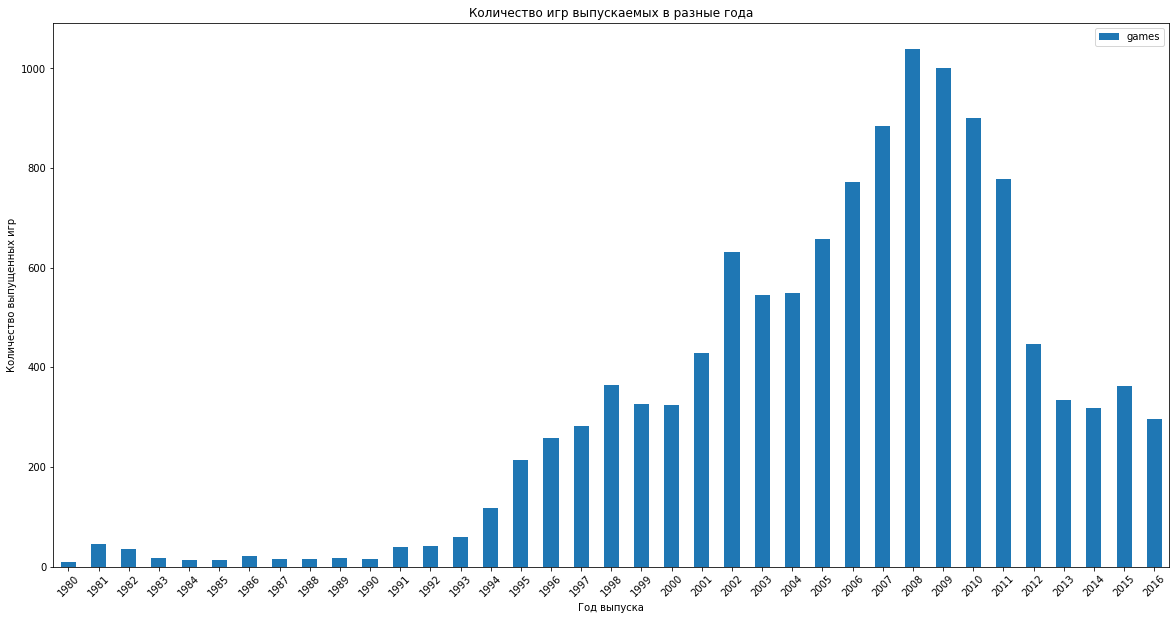

In [43]:
temp_filtered.plot(kind='bar', figsize=(20, 10), rot=45)
plt.title('Количество игр выпускаемых в разные года')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр');


Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами. 

In [44]:
sum_games = df.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
sum_games.head(30)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


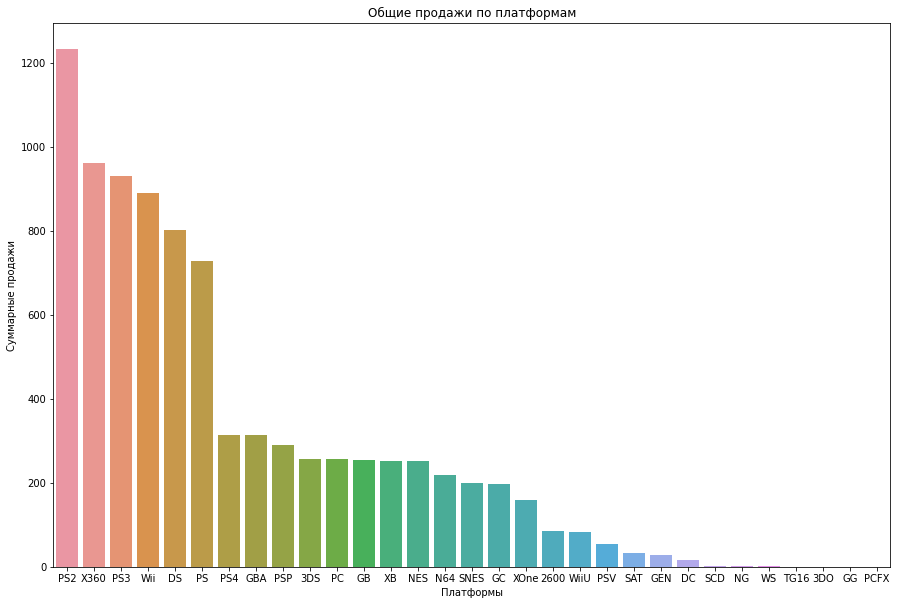

In [45]:
plt.figure(figsize=(15, 10))
sns.barplot(x=sum_games.index, y=sum_games['sum_sales'])
plt.title('Общие продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');


Мы определили, что платформы с наибольшими суммарными продажами это PS2, X360, PS3, Wii, DS, PS. Отфильтруем их.

Выведем ТОП-6 платформ с наибольшими общими продажами.

In [46]:
tmp = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)
tmp.index[:6].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [47]:
platform_filtered = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])]
platform_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Построим таблицу и график распределения по годам.

In [48]:
platform_filtered = platform_filtered.pivot_table( 
    index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum'
)
platform_filtered

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


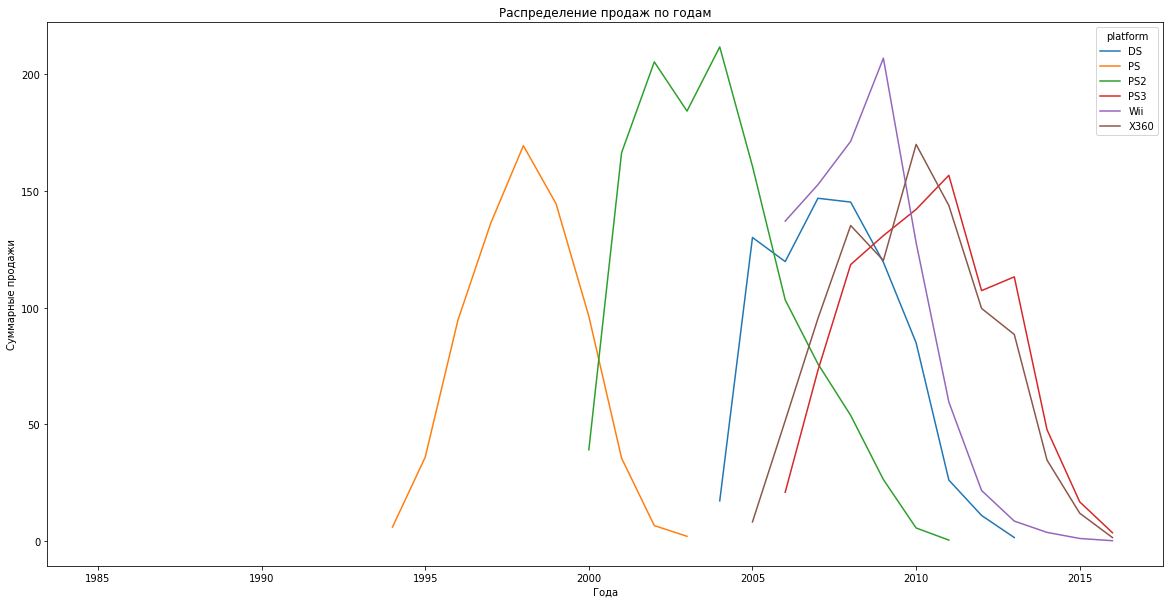

In [49]:
platform_filtered.plot(figsize=(20,10))
plt.title('Распределение продаж по годам')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи');

Самые продаваемые игровые платформы это PS2 и X360. У платформы Wii отмечается взрывной рост продаж в 2009 и потом резкий спад.

В среднем платформы живут 10 лет, и примерно через 5 лет у каждой платформы из топ 6 с наибольшими суммарными продажами наступает пик продаж.


Был выбран период с 2013 по 2016г для того, чтобы оценить актуальную динамику продаж по платформам. И в дальнейшем на этих данных построить прогноз на 2017.

In [50]:
year_actyal = df.loc[df['year_of_release'] >= 2013]
year_actyal

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [51]:
year_actyal_sorted = year_actyal.pivot_table(
    index='year_of_release', values='sum_sales', columns= 'platform', aggfunc='sum'
)

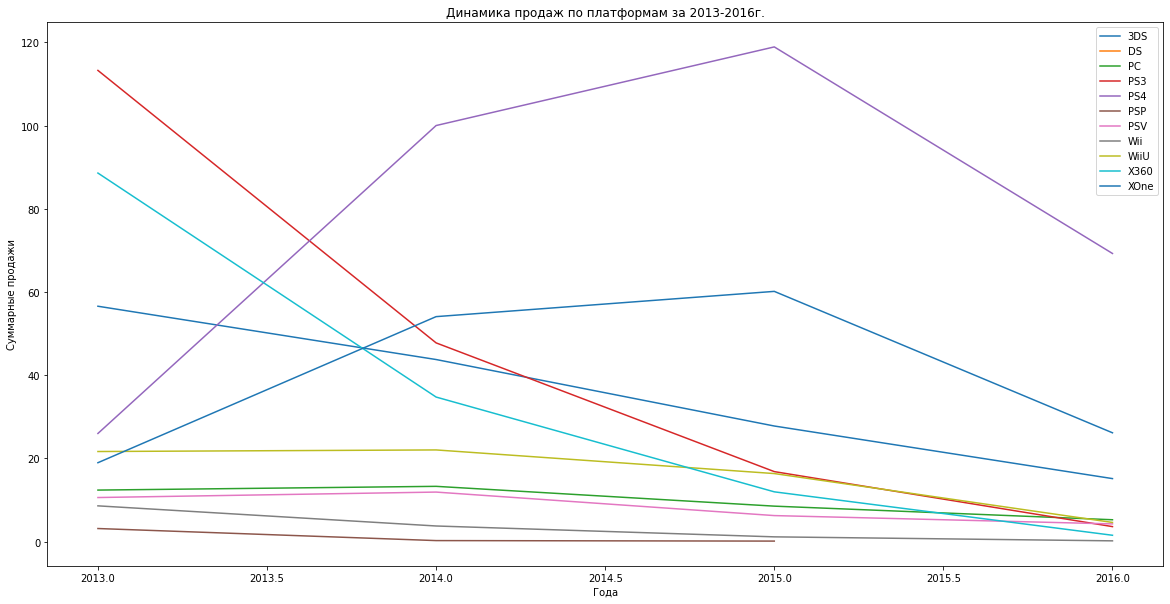

In [52]:
year_actyal_sorted.plot(figsize=(20,10))
plt.legend(loc='upper right')
plt.title('Динамика продаж по платформам за 2013-2016г.')
plt.xlabel('Года')
plt.ylabel('Суммарные продажи');


Лидеры по продажам PS4, XOne, 3DS. Причем PS4 по продажам больше XOne в 2 раза. В целом у всех платформ идет снижение продаж кроме PS4, XOne. До 2015г они показывали рост, но после продажи как и у всех платформ начали снижаться. Так же в отличии от других платформ, за счет количества продаж, даже на снижении эти 2 платформы остаются самыми потенциально прибыльными.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

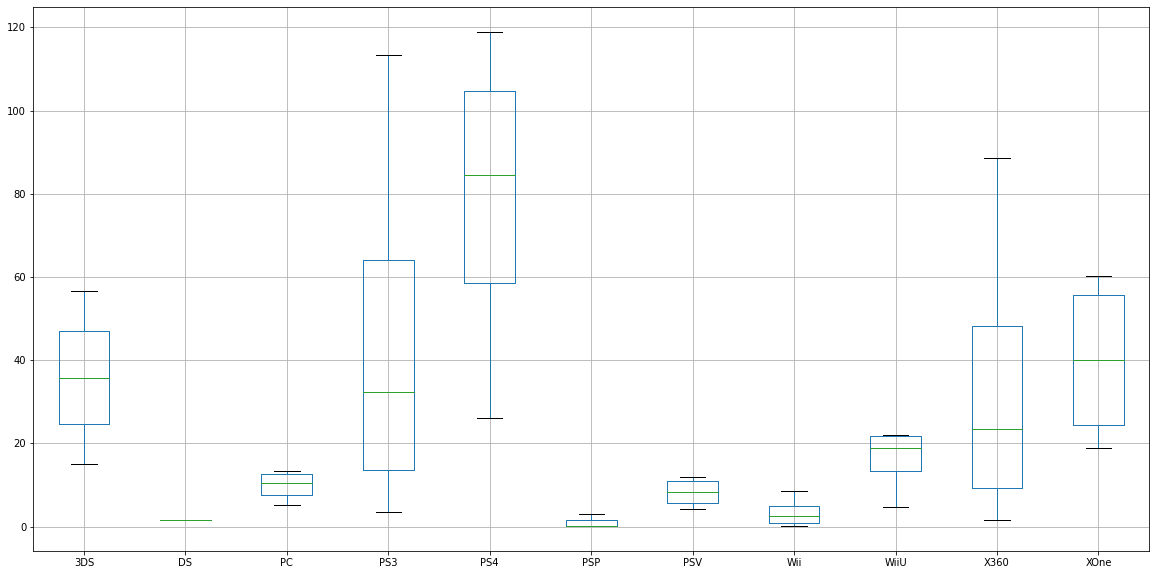

In [53]:
year_actyal_sorted.boxplot(figsize=(20,10));

Построим ящик с усами с ограничением значение по OY, для того, чтобы детально рассмотреть значения.

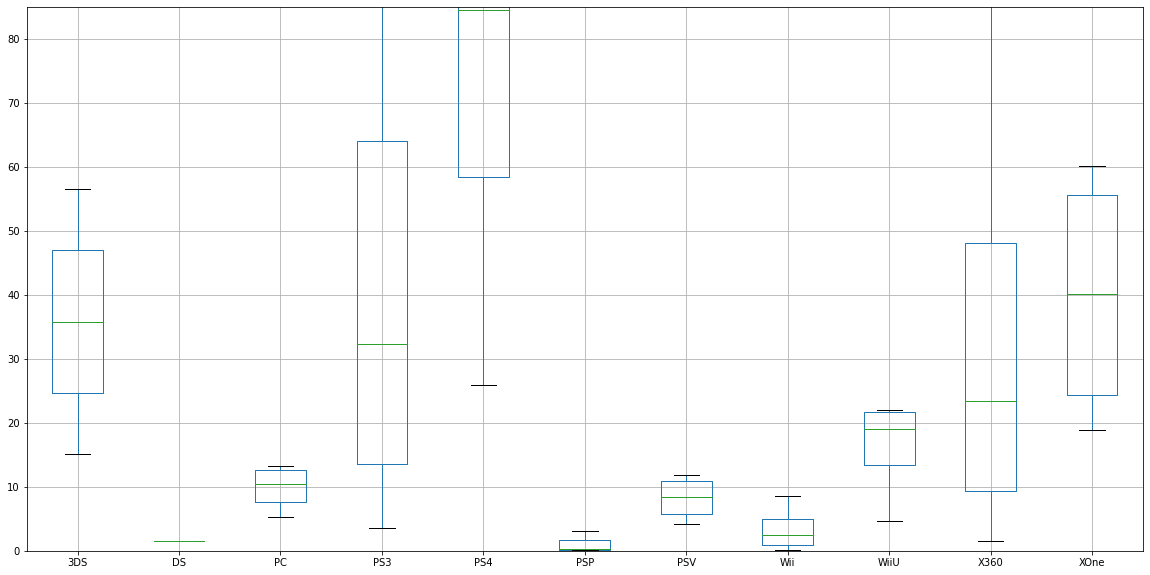

In [54]:
year_actyal_sorted.boxplot(figsize=(20,10))
plt.ylim(0, 85);

Судя по графику PS4 лидер по продажам, на втором месте XOne, на 3 месте 3DS. Медианные значения у PS4 85млн проданных копий, у XOne около 40млн проданных копий, у 3DS около 36млн проданных копий.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

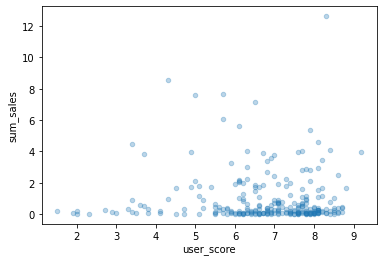

In [55]:
year_actyal.loc[year_actyal['platform'] == 'PS4'].plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3);

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Исправлено.
</div>


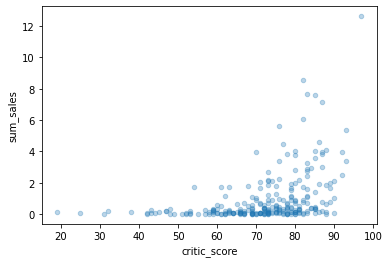

In [56]:
year_actyal.loc[year_actyal['platform'] == 'PS4'].plot(x='critic_score', y='sum_sales', kind='scatter', alpha= 0.3);

In [57]:
ps4 = year_actyal.loc[year_actyal['platform'] == 'PS4']

Посчитаем корреляцию между оценкой критиков и продажами.

In [58]:
ps4['critic_score'].corr(ps4['sum_sales'])

0.40656790206178095

Корреляция слабая.

Посчитаем корреляцию между оценкой пользователей и продажами.

In [59]:
ps4['user_score'].corr(ps4['sum_sales'])

-0.031957110204556376

Корреляция очень слабая.

В целом можно сделать вывод, что оценки критиков демонстрируют линейную, средне-слабую корреляцию с продажами. Оценки пользователей корреляции с продажами не имеют

Посмотрим, как влияют на продажи игр, внутри самых популярных платформ, отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [60]:
def platforms(name_of_platform):
    platform = df.loc[df['platform'] == name_of_platform]
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='sum_sales', data=platform, ax=ax [0])
    sns.scatterplot(x='critic_score', y='sum_sales', data=platform, ax=ax [1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel = 'Оценка пользователей')
    ax[1].set(xlabel = 'Оценка критиков')
    ax[0].set(ylabel = 'Количество продаж')
    ax[1].set(ylabel = 'Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['sum_sales'])
    critic_correl = platform['critic_score'].corr(platform['sum_sales'])
    
    print('Отзывы пользователей', correl)
    print('Отзывы критиков', critic_correl)

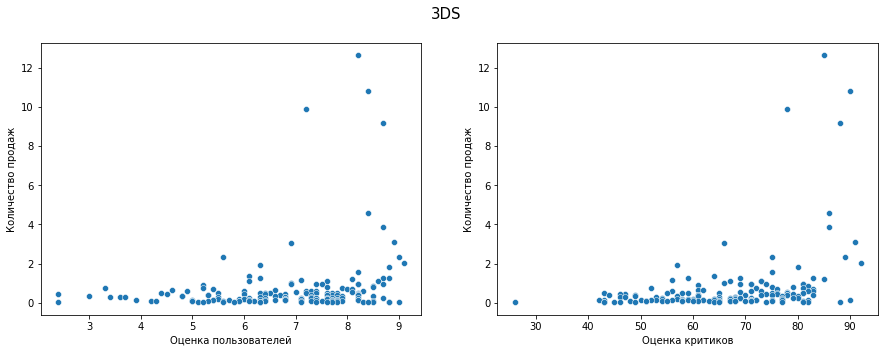

Отзывы пользователей 0.22207843643390882
Отзывы критиков 0.3487397305984834


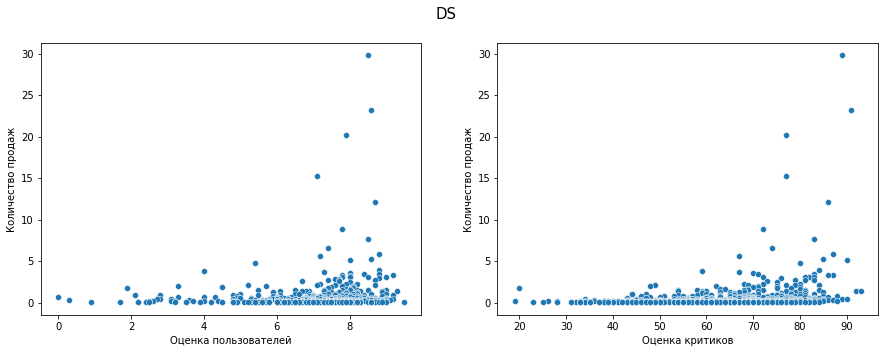

Отзывы пользователей 0.13087600975844202
Отзывы критиков 0.23754579854113453


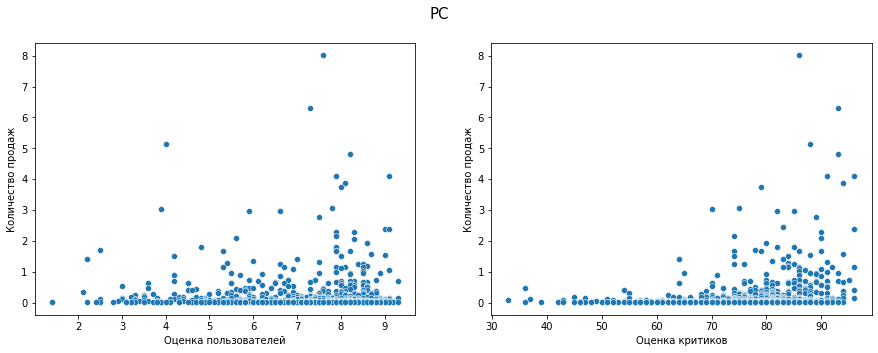

Отзывы пользователей 0.012904741611451175
Отзывы критиков 0.257394718400985


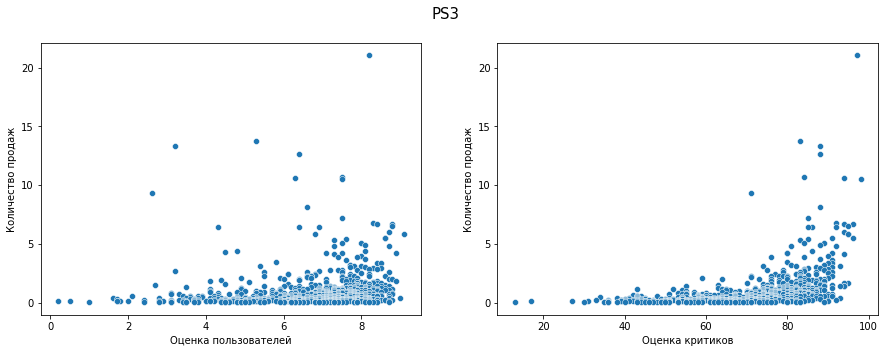

Отзывы пользователей 0.12841562938563006
Отзывы критиков 0.4327589578997135


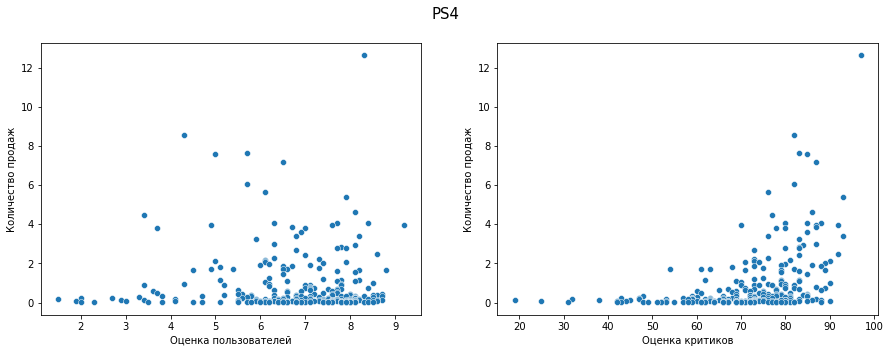

Отзывы пользователей -0.031957110204556376
Отзывы критиков 0.40656790206178095


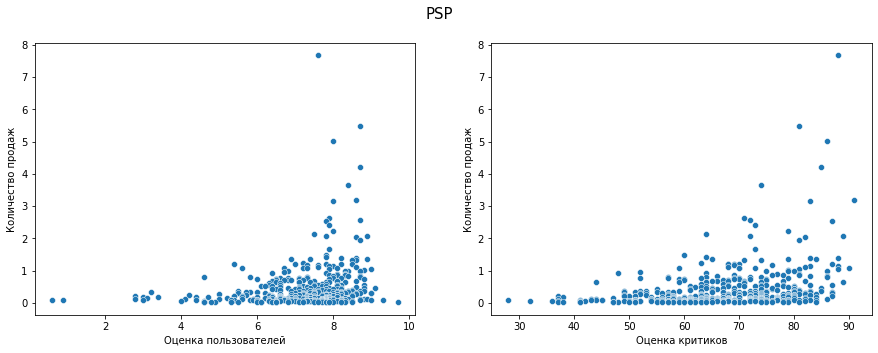

Отзывы пользователей 0.22089026723044386
Отзывы критиков 0.31752451005134863


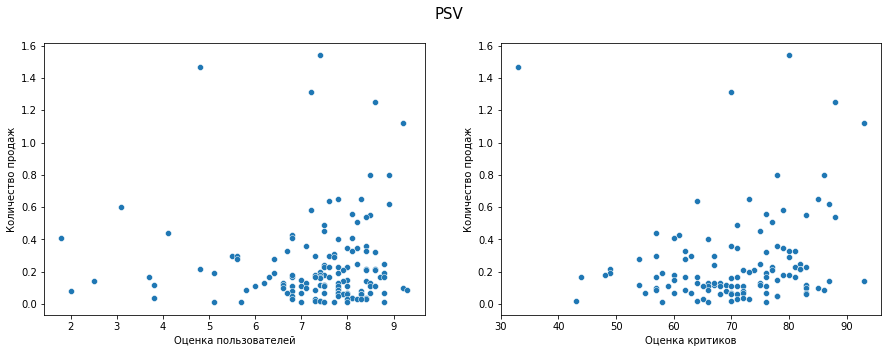

Отзывы пользователей 0.0134887568358865
Отзывы критиков 0.13176292727608935


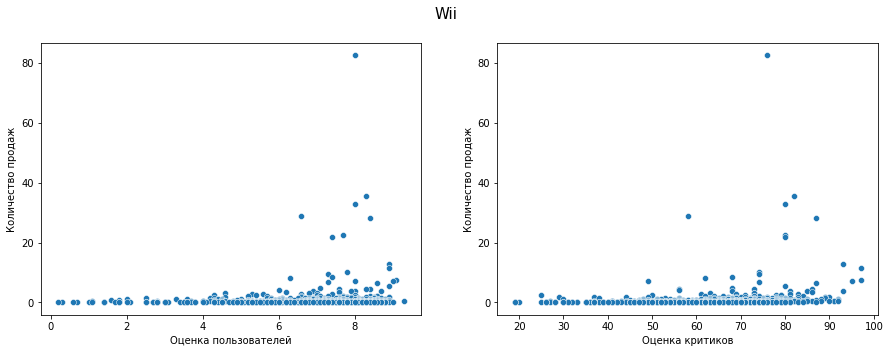

Отзывы пользователей 0.11283121360773772
Отзывы критиков 0.17790728577594908


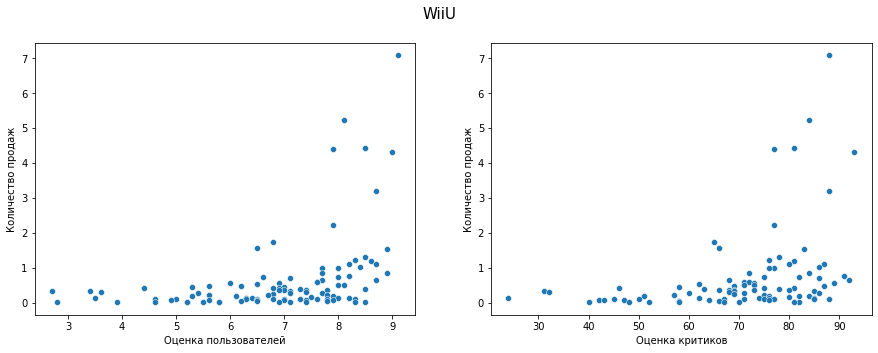

Отзывы пользователей 0.4002190202148617
Отзывы критиков 0.34837976012017485


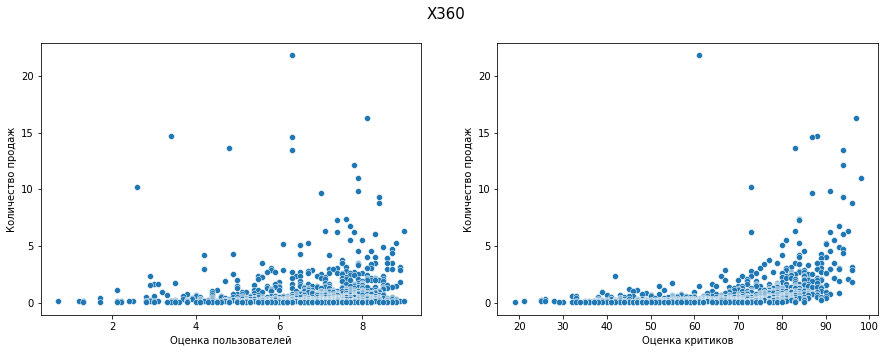

Отзывы пользователей 0.11418661214018049
Отзывы критиков 0.39286589254006954


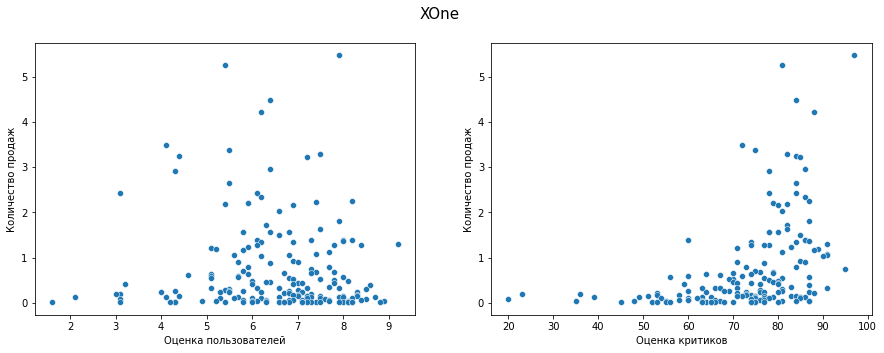

Отзывы пользователей -0.06892505328279414
Отзывы критиков 0.4169983280084017


In [61]:
for platform in year_actyal_sorted:
    platforms(platform)
    

По оценками пользователей корреляция для всех платформ является очень слабой по степени выраженности.

По оценками критиков для всех платформ корреляция является слабой степени выраженности (в среднем коэффициент около 0,3-0,4).


Посмотрим на общее распределение игр по жанрам.

In [62]:
year_actyal.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Создадим столбец median_sales.

In [63]:
year_actyal['median_sales'] = year_actyal[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].median(axis = 1)


/tmp/ipykernel_428/1076989526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_actyal['median_sales'] = year_actyal[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].median(axis = 1)


Создадим сводную таблицу по медианным показателям.

In [64]:
genre_of_games = year_actyal.pivot_table(index='genre', values='median_sales', aggfunc='mean').sort_values(
    by='median_sales', ascending=False
)    
   
genre_of_games

,median_sales
genre,
Shooter,0.280615
Platform,0.132838
Sports,0.101519
Role-Playing,0.099401
Racing,0.094706
Fighting,0.092687
Action,0.088884
Misc,0.082742
Simulation,0.068548


Построим график распределения игр по жанрам.

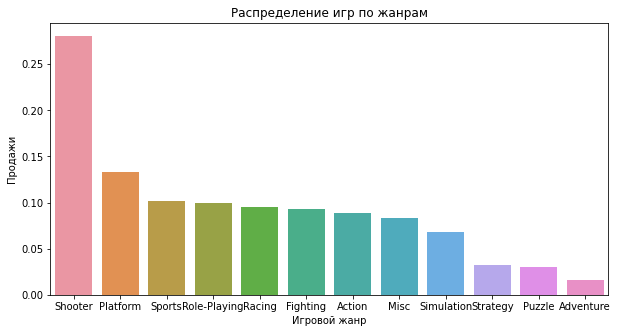

In [65]:
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_of_games.index, y=genre_of_games['median_sales'].sort_values(ascending=False))
plt.title('Распределение игр по жанрам')
plt.xlabel('Игровой жанр')
plt.ylabel('Продажи');           


Вывод: 

Начиная с 1993г. по 2008г. отмечается рост количества игр. До 1993 количество игр было относительно незначительным. Рост количества игр скорее всего связан с распростарнением компьютеров и консолей среди обычных пользователей.

После 2008г. начался спад, это можно связать как с кризисом(люди стали экономить на развлечениях) так и с насыщением рынка достаточно мощными мобильными устройствами: телефоны, планшеты и т.п. которые уже поддерживали относительно "тяжелые" игры. Ряд преимуществ мобильных устройств: компактность, удобство (всегда под рукой), цена, могли быть одним из факторов обусловивших снижение спроса на консоли и пк.

Так же мы определили, что платформы с наибольшими суммарными продажами это PS2, X360, PS3, Wii, DS, PS

Самые продаваемые игровые платформы это PS2 и X360. У платформы Wii отмечается взрывной рост продаж в 2009г. и потом резкий спад.

В среднем платформы живут 10 лет, и примерно через 5 лет у каждой платформы из топ 6 с наибольшими суммарными продажами наступает пик продаж.

Чтобы оценить актуальную динамику продаж по платформам был выбран период с 2013г. по 2016г. Выбор данного периода обусловлен тем, что в дальнейшем на этих данных будет строится прогноз на 2017г.

Лидеры по продажам PS4, XOne, 3DS. Причем PS4 по продажам больше XOne в 2 раза. В целом у всех платформ идет снижение продаж кроме PS4, XOne, до 2015г они показывали рост, но после продажи как и у всех платформ начали снижаться. Так же в отличии от других платформ, за счет большого количества продаж, даже на снижении эти 2 платформы остаются самыми потенциально прибыльными (медианные значения у PS4 85млн проданных копий, у XOne около 40млн проданных копий, у 3DS около 36млн проданных копий.)

Так же мы посчитали корреляцию между оценками критиков и продажами и построили диаграммы рассеивания. 
По оценками пользователей корреляция для всех платформ является очень слабой по степени выраженности. 
По оценками критиков для всех платформ корреляция является слабой степени выраженности (в среднем коэффициент около 0,3-0,4).

Жанр с самыми высокими продажами это Shooter, на втором Platform почти в половину меньше продаж, на третьем  Sports, здесь уже отрыв от 2 места не слишком значителен. Самые низкие продажи у жанра Adventure.



## Составим портрет пользователя каждого региона

Самые популярные платформы (топ-5) в Северной Америке.

In [66]:
platform_na = year_actyal.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
platform_na

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

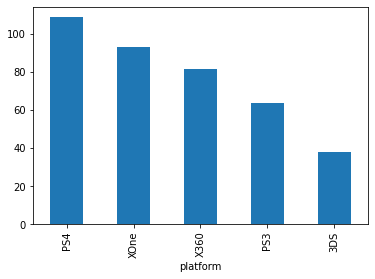

In [67]:
platform_na.plot(kind='bar');

In [68]:
platform_na_sum = year_actyal.groupby('platform')['sum_sales'].sum()

In [69]:
percent_na = platform_na / platform_na_sum * 100
percent_na.sort_values(ascending=False) 

platform
X360    59.692982
XOne    58.448406
PS3     34.999724
PS4     34.615140
3DS     26.666667
DS            NaN
PC            NaN
PSP           NaN
PSV           NaN
Wii           NaN
WiiU          NaN
dtype: float64

Самые популярные платформы в Северной Америке X360    59.718101, XOne    58.291807, WiiU    42.291169, PS4     33.941005,
3DS     24.021435

Самые популярные платформы (топ-5) в Европе.

In [70]:
platform_eu = year_actyal.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
platform_eu

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

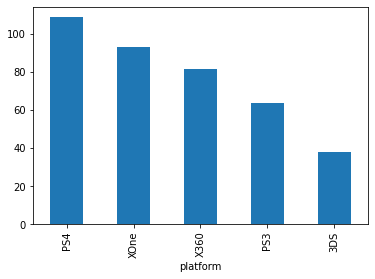

In [71]:
platform_eu.plot(kind='bar');

In [72]:
platform_eu_sum = year_actyal.groupby('platform')['sum_sales'].sum()

In [73]:
percent_eu = platform_eu / platform_eu_sum * 100
percent_eu.sort_values(ascending=False) 

platform
X360    59.692982
XOne    58.448406
PS3     34.999724
PS4     34.615140
3DS     26.666667
DS            NaN
PC            NaN
PSP           NaN
PSV           NaN
Wii           NaN
WiiU          NaN
dtype: float64

Самые популярные платформы в Европе X360    59.718101, XOne    58.291807, WiiU    42.291169, PS4     33.941005, 3DS 24.021435

Самые популярные платформы (топ-5) в Японии.

In [74]:
platform_jp = year_actyal.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
platform_jp

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

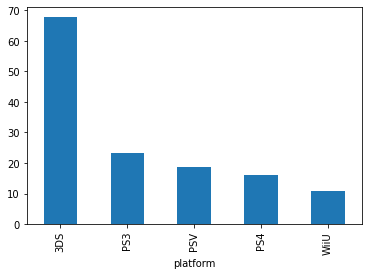

In [75]:
platform_jp.plot(kind='bar');

In [76]:
platform_jp_sum = year_actyal.groupby('platform')['sum_sales'].sum()

In [77]:
percent_jp = platform_jp / platform_jp_sum * 100
percent_jp.sort_values(ascending=False) 

platform
PSV     56.350409
3DS     47.336824
WiiU    16.834287
PS3     12.869977
PS4      5.080537
DS            NaN
PC            NaN
PSP           NaN
Wii           NaN
X360          NaN
XOne          NaN
dtype: float64

Самые популярные платформы  в Японии PSV     80.095238, 3DS     54.869525, PS3     24.338883, WiiU    19.665871, PS4  6.404465

Самые популярные жанры (топ-5) в Северной Америке.

In [78]:
genre_na = year_actyal.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
genre_na

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

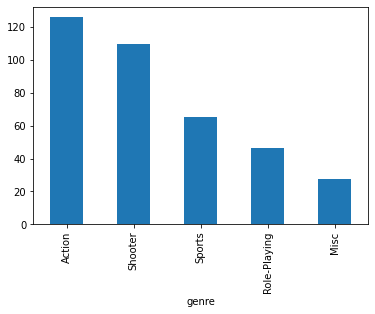

In [79]:
genre_na.plot(kind='bar');

In [80]:
genre_na_sum = year_actyal.groupby('genre')['sum_sales'].sum()

In [81]:
genre_percent_na = genre_na / genre_na_sum * 100
genre_percent_na.sort_values(ascending=False) 

genre
Shooter         47.102756
Misc            43.759949
Sports          43.325589
Action          39.161773
Role-Playing    31.804784
Adventure             NaN
Fighting              NaN
Platform              NaN
Puzzle                NaN
Racing                NaN
Simulation            NaN
Strategy              NaN
dtype: float64

Самые популярные жанры в Северной Америке 

1.Shooter    

2.Sports   

3.Misc

4.Role-Playing  

5.Action   


Самые популярные жанры (топ-5) в Европе.

In [82]:
genre_eu = year_actyal.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
genre_eu

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

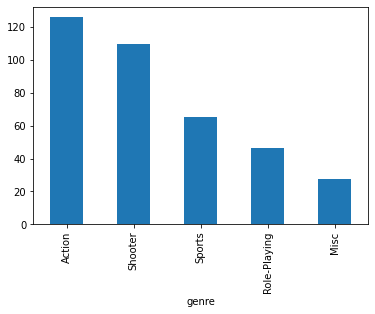

In [83]:
genre_eu.plot(kind='bar');

In [84]:
genre_eu_sum = year_actyal.groupby('genre')['sum_sales'].sum()

In [85]:
genre_percent_eu = genre_eu / genre_eu_sum * 100
genre_percent_eu.sort_values(ascending=False) 

genre
Shooter         47.102756
Misc            43.759949
Sports          43.325589
Action          39.161773
Role-Playing    31.804784
Adventure             NaN
Fighting              NaN
Platform              NaN
Puzzle                NaN
Racing                NaN
Simulation            NaN
Strategy              NaN
dtype: float64

Самые популярные жанры в Европе: 

1.Shooter         

2.Sports          

3.Misc            

4.Role-Playing   

5.Action          

Самые популярные жанры (топ-5) В японии.

In [86]:
genre_jp = year_actyal.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
genre_jp

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

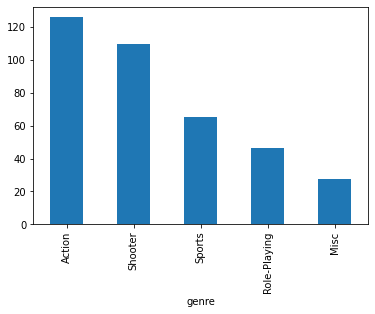

In [87]:
genre_jp.plot(kind='bar');

In [88]:
genre_jp_sum = year_actyal.groupby('genre')['sum_sales'].sum()

In [89]:
genre_percent_jp = genre_jp / genre_jp_sum * 100
genre_percent_jp.sort_values(ascending=False) 

genre
Shooter         47.102756
Misc            43.759949
Sports          43.325589
Action          39.161773
Role-Playing    31.804784
Adventure             NaN
Fighting              NaN
Platform              NaN
Puzzle                NaN
Racing                NaN
Simulation            NaN
Strategy              NaN
dtype: float64

Самые популярные жанры в Японии:
1.Shooter

2.Sports        

3.Misc            

4.Role-Playing    

5.Action          


Влияет ли рейтинг ESRB на продажи в Северной Америке.

Посмотрим сколько игр и с каким рейтингом у нас есть.

In [90]:
year_actyal['rating'].value_counts(dropna=False)

NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

Обнаружили 977 игр без рейтинга, заменим NaN на "заглушку" 'N/A' для того, чтобы корректно рассчитать продажи по регионам.

In [91]:
year_actyal['rating'] = year_actyal['rating'].fillna('N/A')

/tmp/ipykernel_428/4218959178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_actyal['rating'] = year_actyal['rating'].fillna('N/A')


In [92]:
raiting_na = year_actyal.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()
raiting_na

rating
M       165.21
N/A      89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

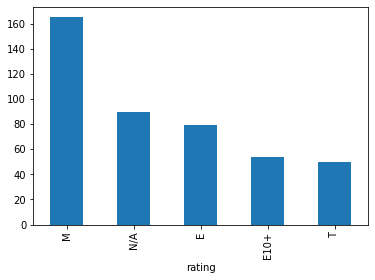

In [93]:
raiting_na.plot(kind='bar');

В Северной Америке самые высокие рейтинги у категории M. Следующий у категории N/A (без рейтинга). На 3 месте игры с рейтингом Е.

Влияет ли рейтинг ESRB на продажи в Европе.

In [94]:
raiting_eu = year_actyal.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()
raiting_eu

rating
M       145.32
E        83.36
N/A      78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

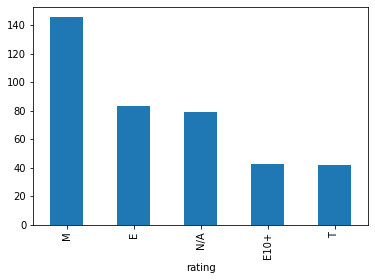

In [95]:
raiting_eu.plot(kind='bar');

В Европе самые высокие рейтинги у категории M. Следующий у категории Е, но разница в продажах почти в 2 раза ниже. На 3 месте N/A(без рейтинга). 

Влияет ли рейтинг ESRB на продажи в Японии.

In [96]:
raiting_jp = year_actyal.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()
raiting_jp

rating
N/A     85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

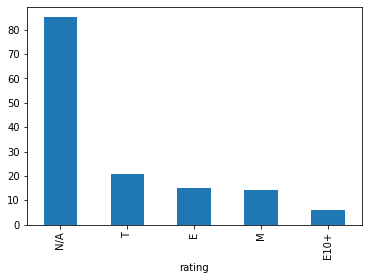

In [97]:
raiting_jp.plot(kind='bar');

В Японии самые высокие рейтинги у категории N/A(без рейтинга), с большим отрывом от остальных. Возможно это связанно с тем, что в Японии есть свое агентство по выдаче рейтинга CERO которое достаточно жестко регламентирует: если вы хотите издавать вашу игру на консолях в нашей стране, вы обязаны получить этот рейтинг. Иначе большие штрафы.

Следующий у категории Т, игры с рейтингом Е на 3 месте. То, что вообще игры с рейтингом американского агенства присутствуют в выоборке по Японии скорее всего связанно, с тем, что возрастные ограничения совпали при переоценке с американского рейтинга на японский.

Вывод: 

Регион  Северная Америка. Перечислим в порядке убывания популярности самые популярные платформы : X360, XOne, WiiU,  PS4, 3DS. Самые популярные жанры: 1.Shooter 2.Sports 3.Misc 4.Role-Playing 5.Action.В Северной Америке самые высокие рейтинги у категории M. Следующий у категории N/A (без рейтинга). На 3 месте игры с рейтингом Е. Потом Е10+ и завершает Т.

Регион Европа. В порядке убывания популярности самые популярные платформы: X360, XOne, WiiU, PS4, 3DS. Самые популярные жанры: 1.Shooter 2.Sports 3.Misc 4.Role-Playing 5.Action. Самый высокий рейтинг ESRB у категории M. Следующий у категории Е, но разница в продажах почти в 2 раза ниже. На 3 месте N/A(без рейтинга). Потом Е10+ и завершает Т.

Регион Япония. В порядке убывания популярности самые популярные платформы:  PSV, 3DS, PS3, WiiU, PS4. Самые популярные жанры: 1.Shooter 2.Sports 3.Misc 4.Role-Playing 5.Action. Самый высокий рейтинг ESRB  у категории N/A(без рейтинга), с большим отрывом от остальных. Возможно это связанно с тем, что в Японии есть свое агентство по выдаче рейтинга CERO которое достаточно жестко регламентирует: если вы хотите издавать вашу игру на консолях в нашей стране, вы обязаны получить этот рейтинг. Иначе большие штрафы.

Следующий у категории Т, игры с рейтингом Е на 3 месте. Потом М и завершает Е10+. То, что вообще игры с рейтингом американского агенства присутствуют в выборке по Японии скорее всего связанно, с тем, что возрастные ограничения совпали при переоценке с американского рейтинга на японский.

## Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 - средние рейтинги по платформам одинаковые

H1 -средние рейтинги по платформам разные.

In [98]:
df_xbox = year_actyal.loc[year_actyal['platform'] == 'XOne']
df_xbox

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,median_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,N/A,7.39,1.395
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,1.330
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,1.015
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49,0.840
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22,0.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01,0.000
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01,0.000
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,N/A,0.01,0.000
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,N/A,0.01,0.000


In [99]:
df_pc = year_actyal.loc[year_actyal['platform'] == 'PC']
df_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,median_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05,0.615
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67,0.420
1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42,0.325
1437,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36,0.245
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28,0.305
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16509,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01,0.000
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01,0.000
16617,Codename: Panzers Complete Collection,PC,2016,Strategy,0.00,0.01,0.0,0.00,NaN,NaN,N/A,0.01,0.000
16631,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.0,0.00,NaN,NaN,N/A,0.01,0.000


In [100]:
df_xbox = year_actyal.loc[year_actyal['platform'] == 'XOne']
df_pc = year_actyal.loc[year_actyal['platform'] == 'PC']

xbox = df_xbox['user_score']
pc = df_pc['user_score']

alpha = 0.05

results = st.ttest_ind(xbox.dropna(), pc.dropna())

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


0.14012658403611647
Не отвергаем нулевую гипотезу


Мы не отвергаем нулевую гипотезу. Следовательно можно предположить, что средние пользовательские рейтинги платформ Xbox One и PC близки к одинаковым.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 = средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 = средние пользовательские рейтинги жанров Action и Sports разные.

In [101]:
df_action = year_actyal.loc[year_actyal['genre'] == 'Action']
df_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,median_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.490
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,3.275
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,2.965
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86,1.585
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,1.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16680,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01,0.000
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01,0.000
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01,0.000
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01,0.000


In [102]:
df_sports = year_actyal.loc[year_actyal['genre'] == 'Sports']
df_sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,median_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,1.200
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,0.885
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46,1.075
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,0.850
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28,0.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16428,R.B.I. Baseball 2016,PS4,2016,Sports,0.01,0.00,0.00,0.00,NaN,NaN,N/A,0.01,0.000
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01,0.000
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,1.4,E,0.01,0.000
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01,0.000


In [103]:
df_action = year_actyal.loc[year_actyal['genre'] == 'Action']
df_sports = year_actyal.loc[year_actyal['genre'] == 'Sports']

action = df_action['user_score']
sports = df_sports['user_score']

alpha = 0.05

results = st.ttest_ind(action.dropna(), sports.dropna())

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


1.0517832389140023e-27
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу. Следовательно можно предположить, что средние пользовательские рейтинги жанров Action и Sports разные.

Вывод: Мы проверили гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевую гипотезу мы сформулировали из предположения, что рейтинги платформ одинаковы, а альтернативную из предположения, что они разные.

H0 - средние рейтинги по платформам одинаковые

H1 -средние рейтинги по платформам разные.
Для проверки мы использовали st.ttest_ind() т.к. если никакого пересечения в выборках нет, то выборки считаются независимыми и нужно использовать ttest_ind.

В результате мы не отвергаем нулевую гипотезу. Следовательно можно предположить, что средние пользовательские рейтинги платформ Xbox One и PC близки к одинаковым.

Так же мы проверили гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулевую гипотезу мы сформулировали из предположения, что рейтинги жанров одинаковы, а альтернативную из предположения, что они разные.

H0 = средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 = средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки мы использовали st.ttest_ind() т.к. в данных выборках так же никакого пересечения, и поэтому выборки считаются независимыми и мы используем ttest_ind.

В результате мы отвергаем нулевую гипотезу. Следовательно можно предположить, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

Мы обработали и изучили данные из интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. и выявили определяющие успешность игры закономерности.

**1. Изучили данные.**

Сначала определили, что в таблице присутствуют пропуски, типы данных в некоторых столбцах не логичны, названия столбцов не приведены к нижнему регистру.

**2. Подготовили данные.**

Мы заменили названия столбцов (привели к нижнему регистру).

Обнаружили пропуски в датафрейме и удалили пропуски в тех столбцах: name, genre, year_of_release где процент пропусков 0.01%, 0.01% и 1.61% соответственно, и удаление данных пропусков не повлияло на дальнейшее исследование.

Заменили типы данных в столбце year_of_release на int. Так как в данном столбце хранятся целые числа годов выпуска, и они не могут быть дробными.

В столбце user_score было найдено значение tbd. Наиболее вероятно, что tbd означает - подлежит уточнению. Следовательно в данный момент, значений user_score еще нет, и их можно заполнить значениями nan, что собственно и было сделанно.

Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец sum_sales.
Проверили на дубликаты. Обнаружили 1 неявный дубликата, но т.к. это 1 строка из 16444 строк, что составлякт 0.006% от всего датафрейма. Поэтому оставили эту строку, не исказив тем самым общий результат исследования.

**3. Провели исследовательский анализ данных.**

Начиная с 1993г. по 2008г. отмечается рост количества игр. До 1993 количество игр было относительно незначительным. Рост количества игр скорее всего связан с распростарнением компьютеров и консолей среди обычных пользователей.

После 2008г. начался спад, это можно связать как с кризисом(люди стали экономить на развлечениях) так и с насыщением рынка достаточно мощными мобильными устройствами: телефоны, планшеты и т.п. которые уже поддерживали относительно "тяжелые" игры. Ряд преимуществ мобильных устройств: компактность, удобство (всегда под рукой), цена, могли быть одним из факторов обусловивших снижение спроса на консоли и пк.

Так же мы определили, что платформы с наибольшими суммарными продажами это PS2, X360, PS3, Wii, DS, PS

Самые продаваемые игровые платформы это PS2 и X360. У платформы Wii отмечается взрывной рост продаж в 2009г. и потом резкий спад.

В среднем платформы живут 10 лет, и примерно через 5 лет у каждой платформы из топ 6 с наибольшими суммарными продажами наступает пик продаж.

Чтобы оценить актуальную динамику продаж по платформам был выбран период с 2013г. по 2016г. Выбор данного периода обусловлен тем, что в дальнейшем на этих данных будет строится прогноз на 2017г.

Лидеры по продажам PS4, XOne, 3DS. Причем PS4 по продажам больше XOne в 2 раза. В целом у всех платформ идет снижение продаж кроме PS4, XOne, до 2015г они показывали рост, но после продажи как и у всех платформ начали снижаться. Так же в отличии от других платформ, за счет большого количества продаж, даже на снижении эти 2 платформы остаются самыми потенциально прибыльными (медианные значения у PS4 85млн проданных копий, у XOne около 40млн проданных копий, у 3DS около 36млн проданных копий.)

Так же мы посчитали корреляцию между оценками критиков и продажами и построили диаграммы рассеивания. 
По оценками пользователей корреляция для всех платформ является очень слабой по степени выраженности. 
По оценками критиков для всех платформ корреляция является слабой степени выраженности (в среднем коэффициент около 0,3-0,4).

Жанр с самыми высокими продажами это Shooter, на втором Platform почти в половину меньше продаж, на третьем  Sports, здесь уже отрыв от 2 места не слишком значителен. Самые низкие продажи у жанра Adventure.


**4. Составили портрет пользователя каждого региона.**

Регион  Северная Америка. Перечислим в порядке убывания популярности самые популярные платформы : X360, XOne, WiiU,  PS4, 3DS. Самые популярные жанры: 1.Shooter 2.Sports 3.Misc 4.Role-Playing 5.Action.В Северной Америке самые высокие рейтинги у категории M. Следующий у категории N/A (без рейтинга). На 3 месте игры с рейтингом Е. Потом Е10+ и завершает Т.

Регион Европа. В порядке убывания популярности самые популярные платформы: X360, XOne, WiiU, PS4, 3DS. Самые популярные жанры: 1.Shooter 2.Sports 3.Misc 4.Role-Playing 5.Action. Самый высокий рейтинг ESRB у категории M. Следующий у категории Е, но разница в продажах почти в 2 раза ниже. На 3 месте N/A(без рейтинга). Потом Е10+ и завершает Т.

Регион Япония. В порядке убывания популярности самые популярные платформы:  PSV, 3DS, PS3, WiiU, PS4. Самые популярные жанры: 1.Shooter 2.Sports 3.Misc 4.Role-Playing 5.Action. Самый высокий рейтинг ESRB  у категории N/A(без рейтинга), с большим отрывом от остальных. Возможно это связанно с тем, что в Японии есть свое агентство по выдаче рейтинга CERO которое достаточно жестко регламентирует: если вы хотите издавать вашу игру на консолях в нашей стране, вы обязаны получить этот рейтинг. Иначе большие штрафы.

Следующий у категории Т, игры с рейтингом Е на 3 месте. Потом М и завершает Е10+. То, что вообще игры с рейтингом американского агенства присутствуют в выборке по Японии скорее всего связанно, с тем, что возрастные ограничения совпали при переоценке с американского рейтинга на японский.


**5. Проверили гипотезы.**

Мы проверили гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевую гипотезу мы сформулировали из предположения, что рейтинги платформ одинаковы, а альтернативную из предположения, что они разные.

H0 - средние рейтинги по платформам одинаковые

H1 -средние рейтинги по платформам разные.
Для проверки мы использовали st.ttest_ind() т.к. если никакого пересечения в выборках нет, то выборки считаются независимыми и нужно использовать ttest_ind.

В результате мы не отвергаем нулевую гипотезу. Следовательно можно предположить, что средние пользовательские рейтинги платформ Xbox One и PC близки к одинаковым.

Так же мы проверили гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулевую гипотезу мы сформулировали из предположения, что рейтинги жанров одинаковы, а альтернативную из предположения, что они разные.

H0 = средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 = средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки мы использовали st.ttest_ind() т.к. в данных выборках так же никакого пересечения, и поэтому выборки считаются независимыми и мы используем ttest_ind.

В результате мы отвергаем нулевую гипотезу. Следовательно можно предположить, что средние пользовательские рейтинги жанров Action и Sports разные.

Исходя из этих данных самые перспективные в плане мировых продаж платформы на 2017г. это PS4 и XOne. Жанр с самыми высокими продажами это Shooter.
В Северной Америке и Европе лучше всего рекламировать игры на платформу X360, жанр Shooter, рейтинг ESRB категория М.
В Японии лучше всего рекламировать игры на платформу PSV, жанр Shooter, рейтинг ESRB в Японии практически не учитывается, из за особенностей работы собственного рейтингового агенства. Для оценки затрат на рекламу по рейтингу, нужно обработать данные агентства по выдаче рейтинга CERO.

При выборе рекламной стратегии, обращать на отзывы пользователей или критиков не имеет смысла. 